In [1]:
# This quickly generates a FlareLightCurve
from altaipony.tests.test_flarelc import mock_flc

#Alternatively, use
from altaipony.flarelc import FlareLightCurve

# We shall be testing our code
import pytest 

# The basis
import numpy as np
import pandas as pd

# For plotting diagnostics
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

import matplotlib
matplotlib.rc('font', **font)

# Import our main class
from qlearning.flarefairy import FlareFairy

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Let's generate a flare light curve to work with

# small size to keep computational effort at bay
n = 200

# time, flux noise
time = np.linspace(20,22,n)
flux = 500. + 15.* np.sin(time*4) + 10 * np.random.rand(n)
flux_err = flux * .01

# a hand-crafted flare signal
flux[60] = 730
flux[61] = 600
flux[62] = 560
flux[63] = 530
flux[64] = 525
flux[65] = 520
flux[66] = 515
flux[67] = 510

# define FlareLightCurve object
flc = FlareLightCurve(time=time, flux=flux, flux_err=flux_err)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


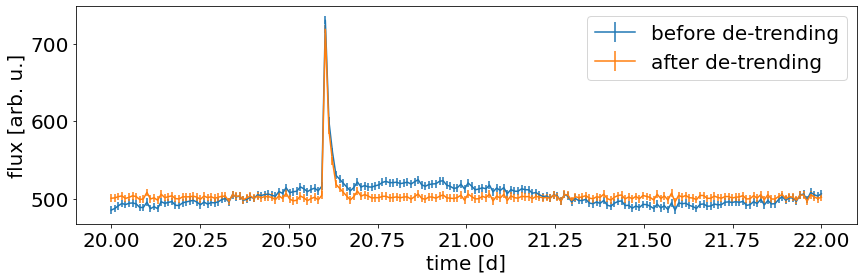

In [3]:
# get de-trended light curve (useful for later)
flcd = flc.detrend("savgol")

# look at the result
plt.figure(figsize=(14,4))
plt.errorbar(flcd.time, flcd.flux, yerr=flcd.flux_err, label="before de-trending");
plt.errorbar(flcd.time, flcd.detrended_flux, yerr=flcd.detrended_flux_err, label="after de-trending");
plt.legend()
plt.xlabel("time [d]")
plt.ylabel("flux [arb. u.]");

In [4]:
# Find the flare with AltaiPony
flare = flcd.find_flares().flares.iloc[0]
flare.dropna()

Found 1 candidate(s) in the (0,200) gap.


istart                             60
istop                              64
tstart                         20.603
tstop                         20.6432
ed_rec                        632.936
ed_rec_err                    13.7115
ampl_rec                     0.431307
dur                          0.040201
total_n_valid_data_points         200
Name: 0, dtype: object

<ErrorbarContainer object of 3 artists>

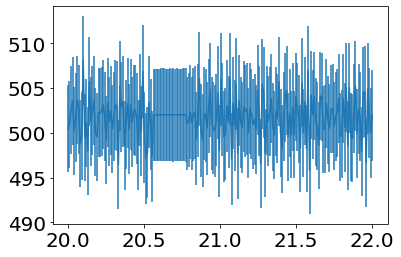

In [5]:
# Instantiate a fairy
flcd.detrended_flux[56:78] = np.nanmedian(flcd.detrended_flux)
fairy = FlareFairy(flcd, flare, LEARNING_RATE=.6, DISCOUNT=.5,  amax=2., dmax=2.,)
plt.errorbar(flcd.time, flcd.detrended_flux, yerr=flcd.detrended_flux_err)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


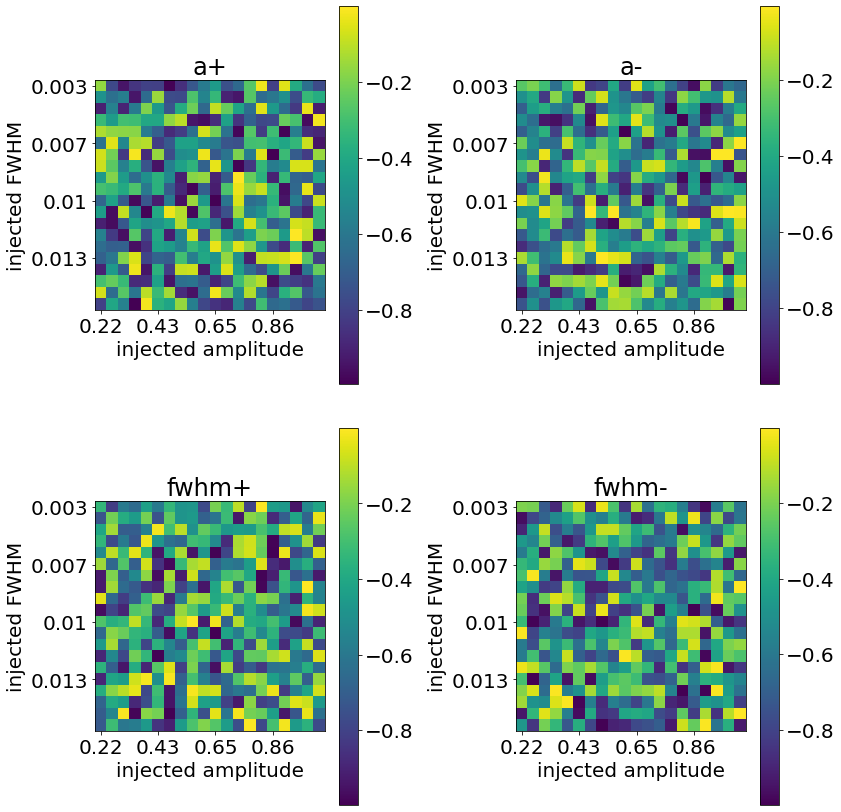

In [6]:
# Show the initial Q-table with the four possible steps
# increment / decrement amplitude
# increment / decrement FWHM

fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes = [_ for a in Axes for _ in a]
for i,la in enumerate(["a+","a-","fwhm+","fwhm-"]):
    
    pos = axes[i].imshow(fairy.q_table[:,:,i])
    axes[i].set_xticks(np.arange(0,fairy.q_table.shape[0],5))
    axes[i].set_xticklabels(np.round(np.linspace(fairy.amin,fairy.amax, fairy.q_table.shape[0]//5),2))
    axes[i].set_yticks(np.arange(0,fairy.q_table.shape[1],5))
    axes[i].set_yticklabels(np.round(np.linspace(fairy.dmin,fairy.dmax, fairy.q_table.shape[1]//5),3))
    axes[i].set_xlabel("injected amplitude")
    axes[i].set_ylabel("injected FWHM")
    axes[i].set_title(la)
    fig.colorbar(pos, ax=axes[i])
plt.tight_layout()

In [7]:
%%capture
# Now let the fairy find the good flares
end_df = fairy.run_n_episodes(4)

Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) 

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|#########################################################################|
Found 0 candidate(s) in the (0,200) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,200) gap.
100%|###############################

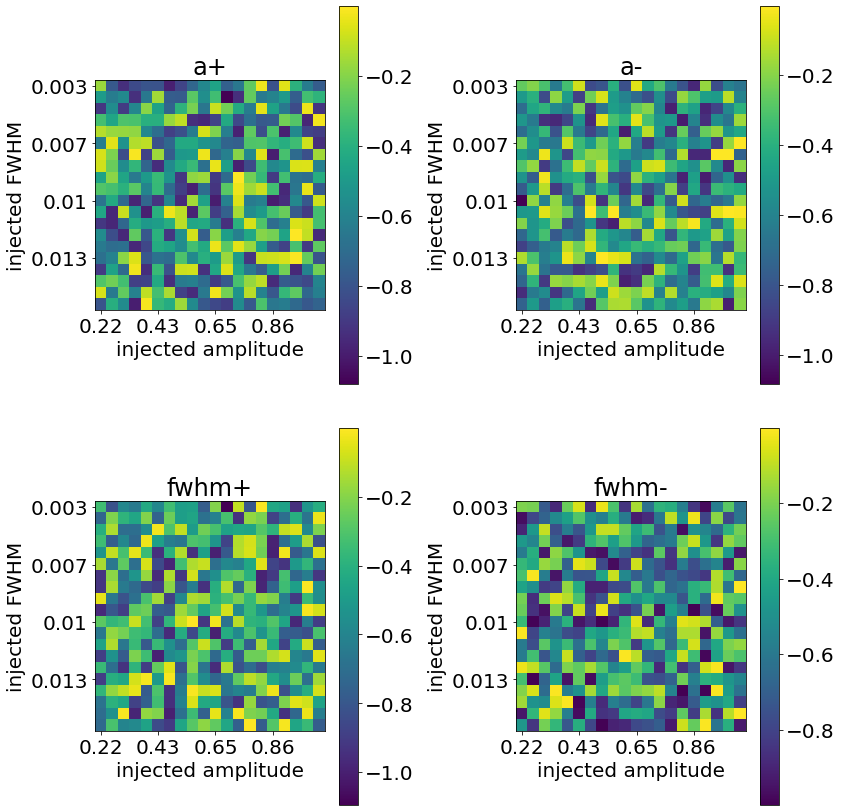

In [8]:
# Now show the Q-table after the Fairy ran across the parameter space
# increment / decrement amplitude
# increment / decrement FWHM

fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes = [_ for a in Axes for _ in a]
for i,la in enumerate(["a+","a-","fwhm+","fwhm-"]):
    
    pos = axes[i].imshow(fairy.q_table[:,:,i])
    axes[i].set_xticks(np.arange(0,fairy.q_table.shape[0],5))
    axes[i].set_xticklabels(np.round(np.linspace(fairy.amin,fairy.amax, fairy.q_table.shape[0]//5),2))
    axes[i].set_yticks(np.arange(0,fairy.q_table.shape[1],5))
    axes[i].set_yticklabels(np.round(np.linspace(fairy.dmin,fairy.dmax, fairy.q_table.shape[1]//5),3))
    axes[i].set_xlabel("injected amplitude")
    axes[i].set_ylabel("injected FWHM")
    axes[i].set_title(la)
    fig.colorbar(pos, ax=axes[i])
plt.tight_layout()